In [1]:
from os import walk
import re
from os.path import join, split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from os import makedirs

import geopandas as gpd
import geoplot as gplt
from scipy.stats import ttest_ind

import matplotlib as mpl
mpl.rcParams["font.size"] = 14
from utils.metrics import *

In [2]:
sadc = ['Angola', 'Botswana', 'Comoros', 'Democratic_Republic_of_Congo',
        'Eswatini', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique',
        'Namibia', 'South_Africa', 'Tanzania', 'Zambia', 'Zimbabwe', 'Seychelles']
alphas = [0.05, 0.1, 0.2]
files = []

for alpha in alphas:
    for country in sadc:
        data_path = country + '/' + str(alpha) + '/results/'

        for (dirpath, _, filenames) in walk(data_path):
            files += [join(dirpath, file) for file in filenames]
            break

In [3]:
decimals = 4

# all trials for all countries
regexs = ['.*cases*', '.*deaths*']
for regex in regexs:
    r = re.compile(regex)
    files_filter = list(filter(r.match, files))
    for alpha in alphas:
        r = re.compile('.*/' + str(alpha) + '/*')
        files_filter_ = list(filter(r.match, files_filter))
        vars()["{}_results_{}".format(regex.split('*')[1], str(alpha).split('.')[1])] = {}
        for file in files_filter_:
            vars()["{}_results_{}".format(regex.split('*')[1], str(alpha).split('.')[1])][file.split('/')[0]] = pd.read_pickle(file).round(decimals = decimals)
        

In [6]:
tab_path = 'tables/'
makedirs(tab_path, exist_ok = True)

# forecast performance summary stats RSA
cases_results_1['South_Africa'].filter(regex = r'(rmse|smape)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_forecast.xlsx')
deaths_results_1['South_Africa'].filter(regex = r'(rmse|smape)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_forecast.xlsx')

In [7]:
# statistical significance tests RSA MIS
sig = pd.DataFrame(columns = ['cases_' + col for col in cases_results_1['South_Africa'].filter(regex = r'(mis)').drop(['mis_meslstm'], axis = 1).columns.to_list()] +
                        ['deaths_' + col for col in deaths_results_1['South_Africa'].filter(regex = r'(mis)').drop(['mis_meslstm'], axis = 1).columns.to_list()],
                   index = ['statistic', 'p_value'])

for col in cases_results_1['South_Africa'].filter(regex = r'(mis)').drop(['mis_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(cases_results_1['South_Africa']['mis_meslstm'],
              cases_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'cases_' + col] = sig_vals.statistic
    sig.loc['p_value', 'cases_' + col] = sig_vals.pvalue
  
    
for col in deaths_results_1['South_Africa'].filter(regex = r'(mis)').drop(['mis_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(deaths_results_1['South_Africa']['mis_meslstm'],
              deaths_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'deaths_' + col] = sig_vals.statistic
    sig.loc['p_value', 'deaths_' + col] = sig_vals.pvalue

sig.round(decimals = decimals).to_excel(tab_path + 't_test_mis.xlsx')

# statistical significance tests RSA sMAPE
sig = pd.DataFrame(columns = ['cases_' + col for col in cases_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_meslstm'], axis = 1).columns.to_list()] +
                        ['deaths_' + col for col in deaths_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_meslstm'], axis = 1).columns.to_list()],
                   index = ['statistic', 'p_value'])

for col in cases_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(cases_results_1['South_Africa']['smape_meslstm'],
              cases_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'cases_' + col] = sig_vals.statistic
    sig.loc['p_value', 'cases_' + col] = sig_vals.pvalue
  
    
for col in deaths_results_1['South_Africa'].filter(regex = r'(smape)').drop(['smape_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(deaths_results_1['South_Africa']['smape_meslstm'],
              deaths_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'deaths_' + col] = sig_vals.statistic
    sig.loc['p_value', 'deaths_' + col] = sig_vals.pvalue

sig.round(decimals = decimals).to_excel(tab_path + 't_test_smape.xlsx')

# statistical significance tests RSA Coverage
sig = pd.DataFrame(columns = ['cases_' + col for col in cases_results_1['South_Africa'].filter(regex = r'(cov)').drop(['cov_meslstm'], axis = 1).columns.to_list()] +
                        ['deaths_' + col for col in deaths_results_1['South_Africa'].filter(regex = r'(cov)').drop(['cov_meslstm'], axis = 1).columns.to_list()],
                   index = ['statistic', 'p_value'])

for col in cases_results_2['South_Africa'].filter(regex = r'(cov)').drop(['cov_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(cases_results_1['South_Africa']['cov_meslstm'],
              cases_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='greater', trim=0)
    sig.loc['statistic', 'cases_' + col] = sig_vals.statistic
    sig.loc['p_value', 'cases_' + col] = sig_vals.pvalue
  
    
for col in deaths_results_2['South_Africa'].filter(regex = r'(cov)').drop(['cov_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(deaths_results_1['South_Africa']['cov_meslstm'],
              deaths_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='greater', trim=0)
    sig.loc['statistic', 'deaths_' + col] = sig_vals.statistic
    sig.loc['p_value', 'deaths_' + col] = sig_vals.pvalue

sig.round(decimals = decimals).to_excel(tab_path + 't_test_cov.xlsx')

# statistical significance tests RSA RMSE
sig = pd.DataFrame(columns = ['cases_' + col for col in cases_results_1['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_meslstm'], axis = 1).columns.to_list()] +
                        ['deaths_' + col for col in deaths_results_1['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_meslstm'], axis = 1).columns.to_list()],
                   index = ['statistic', 'p_value'])

for col in cases_results_2['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(cases_results_1['South_Africa']['rmse_meslstm'],
              cases_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'cases_' + col] = sig_vals.statistic
    sig.loc['p_value', 'cases_' + col] = sig_vals.pvalue
  
    
for col in deaths_results_2['South_Africa'].filter(regex = r'(rmse)').drop(['rmse_meslstm'], axis = 1).columns.to_list():
    sig_vals = ttest_ind(deaths_results_1['South_Africa']['rmse_meslstm'],
              deaths_results_1['South_Africa'][col], axis=0, equal_var=False,
              nan_policy='propagate', permutations=None, random_state=None, alternative='less', trim=0)
    sig.loc['statistic', 'deaths_' + col] = sig_vals.statistic
    sig.loc['p_value', 'deaths_' + col] = sig_vals.pvalue

sig.round(decimals = decimals).to_excel(tab_path + 't_test_rmse.xlsx')

In [8]:
# Diebold-Marino
files_01 = []
for (dirpath, _, filenames) in walk(join('South_Africa', str(alphas[-1]), 'results')):
    files_01 += [join(dirpath, file) for file in filenames]
regex = '.*/forecast.pkl'
r = re.compile(regex)
files_01 = list(filter(r.match, files_01))
dm_dict = {}
for file in files_01:
    dm_dict[file.split('/')[-2]] = pd.read_pickle(file).round(decimals = decimals)

dm_results = pd.DataFrame(index = ['statistic', 'p_value'])
dm_results

for key in [key for key in dm_dict.keys() if not key.startswith("mes_")]:
    dm_results['deaths_' + key] = diebold_mariano_test(dm_dict['mes_lstm']['total_deaths_true'], dm_dict['mes_lstm']['total_deaths_pred'], dm_dict[key]['total_deaths_pred'])
    
for key in [key for key in dm_dict.keys() if not key.startswith("mes_")]:
    dm_results['cases_' + key] =  diebold_mariano_test(dm_dict['mes_lstm']['total_cases_true'], dm_dict['mes_lstm']['total_cases_pred'], dm_dict[key]['total_cases_pred'])

dm_results.round(decimals = decimals).to_excel(tab_path + 'dm_test.xlsx')

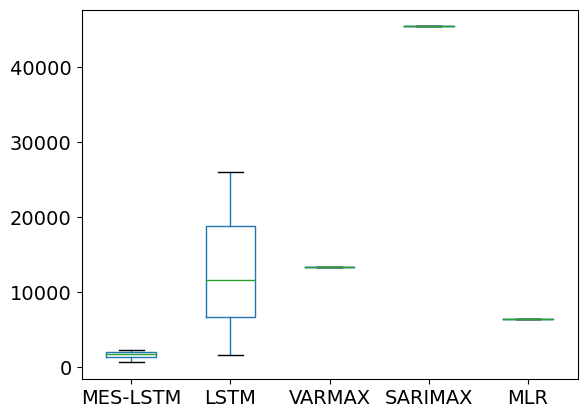

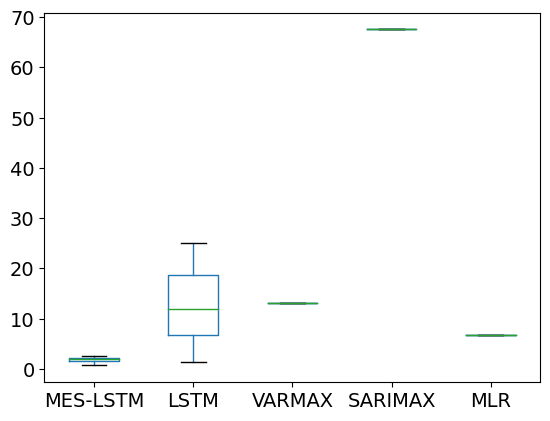

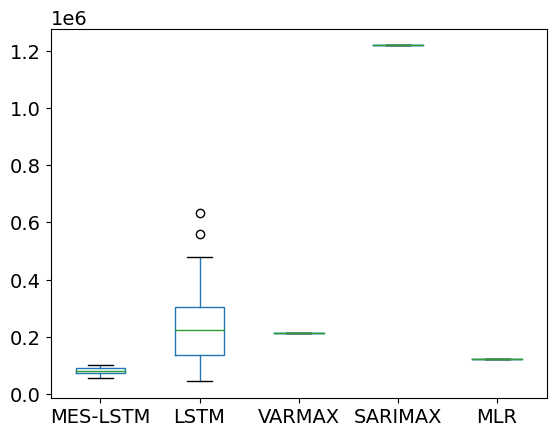

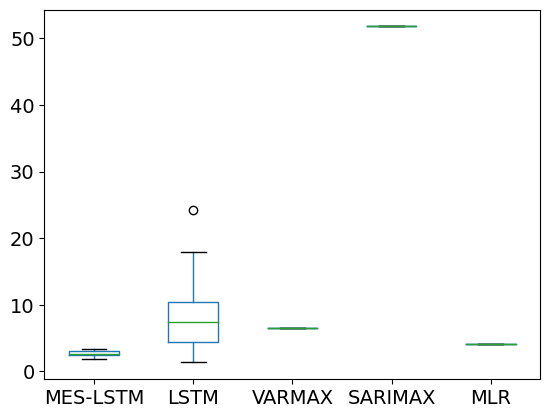

In [9]:
save_path = 'figures/'
makedirs(save_path, exist_ok = True)
drop_col = ['MES-LSTM', 'LSTM', 'VARMAX', 'SARIMAX', 'MLR']
rename_col = ['MES-LSTM']

fig = plt.figure()
deaths_results_1['South_Africa'].filter(regex = r'(rmse)').set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'deaths_rmse_box.pdf', dpi = 600)
plt.show()

fig = plt.figure()
deaths_results_1['South_Africa'].filter(regex = r'(smape)').set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'deaths_smape_box.pdf', dpi = 600)
plt.show()


fig = plt.figure()
cases_results_1['South_Africa'].filter(regex = r'(rmse)').set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'cases_rmse_box.pdf', dpi = 600)
plt.show()


fig = plt.figure()
cases_results_1['South_Africa'].filter(regex = r'(smape)').set_axis(drop_col, axis = 1, inplace = False).boxplot(grid = False)
plt.savefig(save_path + 'cases_smape_box.pdf', dpi = 600)
plt.show()

In [10]:
# PI performance summary stats RSA
cases_results_1['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_pi_1.xlsx')
cases_results_05['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_pi_05.xlsx')
cases_results_2['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'cases_stats_pi_2.xlsx')
deaths_results_1['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_pi_1.xlsx')
deaths_results_05['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_pi_05.xlsx')
deaths_results_2['South_Africa'].filter(regex = r'(mis|cov)').describe().round(decimals = decimals).to_excel(tab_path + 'deaths_stats_pi_2.xlsx')

In [11]:
# accuracy for all countries (averaged trials)
cases_acc_2 = pd.DataFrame(columns = cases_results_2[list(cases_results_2.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_2 = pd.DataFrame(columns = deaths_results_2[list(deaths_results_2.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize
cases_acc_05 = pd.DataFrame(columns = cases_results_05[list(cases_results_05.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_05 = pd.DataFrame(columns = deaths_results_05[list(deaths_results_05.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize
cases_acc_1 = pd.DataFrame(columns = cases_results_1[list(cases_results_1.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_1 = pd.DataFrame(columns = deaths_results_1[list(deaths_results_1.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize

for key in list(deaths_results_1.keys()): # for each country
    cases_acc_2.loc[key] = cases_results_2[key].mean(axis = 0).round(decimals = decimals)
    deaths_acc_2.loc[key] = deaths_results_2[key].mean(axis = 0).round(decimals = decimals)
    cases_acc_05.loc[key] = cases_results_05[key].mean(axis = 0).round(decimals = decimals)
    deaths_acc_05.loc[key] = deaths_results_05[key].mean(axis = 0).round(decimals = decimals)
    cases_acc_1.loc[key] = cases_results_1[key].mean(axis = 0).round(decimals = decimals)
    deaths_acc_1.loc[key] = deaths_results_1[key].mean(axis = 0).round(decimals = decimals)

In [12]:
# forecasts all countries
cases_acc_1.filter(regex = r'(rmse|smape)').to_excel(tab_path + 'sadc_cases_forecast.xlsx')
deaths_acc_1.filter(regex = r'(rmse|smape)').to_excel(tab_path + 'sadc_deaths_forecast.xlsx')

# PI all counries
cases_acc_2.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_cases_pi_2.xlsx')
cases_acc_05.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_cases_pi_05.xlsx')
cases_acc_1.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_cases_pi_1.xlsx')
deaths_acc_2.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_deaths_pi_2.xlsx')
deaths_acc_05.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_deaths_pi_05.xlsx')
deaths_acc_1.filter(regex = r'(mis|cov)').to_excel(tab_path + 'sadc_deaths_pi_1.xlsx')

In [13]:
# accuracy for all sadc (averaged trials, avergaed countries) for bar plots

cases_sadc_2 = cases_acc_2.mean(axis = 0).round(decimals = decimals)
deaths_sadc_2 = deaths_acc_2.mean(axis = 0).round(decimals = decimals)
cases_sadc_05 = cases_acc_05.mean(axis = 0).round(decimals = decimals)
deaths_sadc_05 = deaths_acc_05.mean(axis = 0).round(decimals = decimals)
cases_sadc_1 = cases_acc_1.mean(axis = 0).round(decimals = decimals)
deaths_sadc_1 = deaths_acc_1.mean(axis = 0).round(decimals = decimals)

### South Africa

In [14]:
# objects = ('LSTM', 'MES-LSTM', 'VARMAX', 'SARIMAX', 'MLR')
objects = ('MES-LSTM', 'LSTM', 'VARMAX', 'SARIMAX', 'MLR')
y_pos = np.arange(len(objects))
bar_width = 0.35
opacity = 0.85

### SMAPE

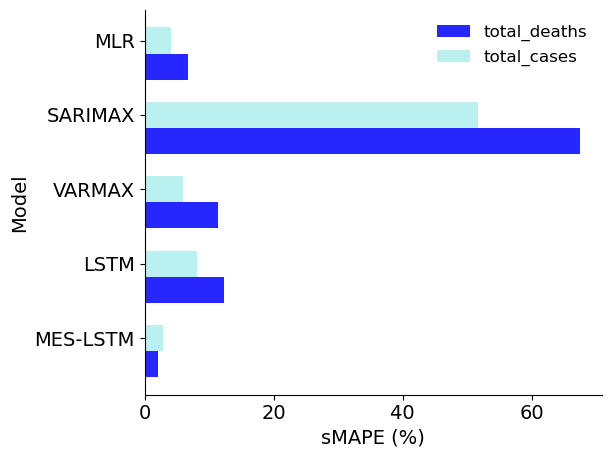

In [15]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
legend_loc = 0
legend_font = 12

total_cases_2 = cases_acc_2.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_2 = deaths_acc_2.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')
plt.xlabel('sMAPE (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'smape_sa.pdf', dpi = 600)
plt.show()


### RMSE

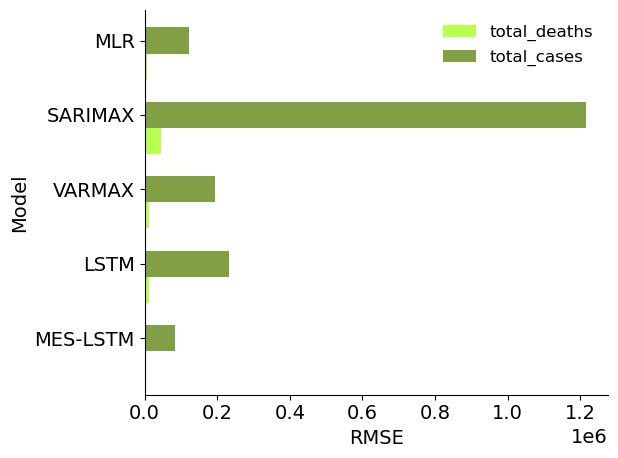

In [16]:
total_cases_2 = cases_acc_2.filter(like = 'rmse', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_2 = deaths_acc_2.filter(like = 'rmse', axis = 1).filter(like = 'South', axis = 0).values[0]

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'rmse_sa.pdf', dpi = 600)
plt.show()

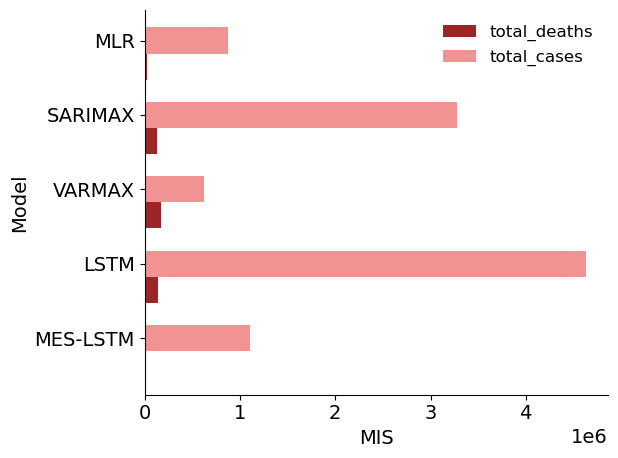

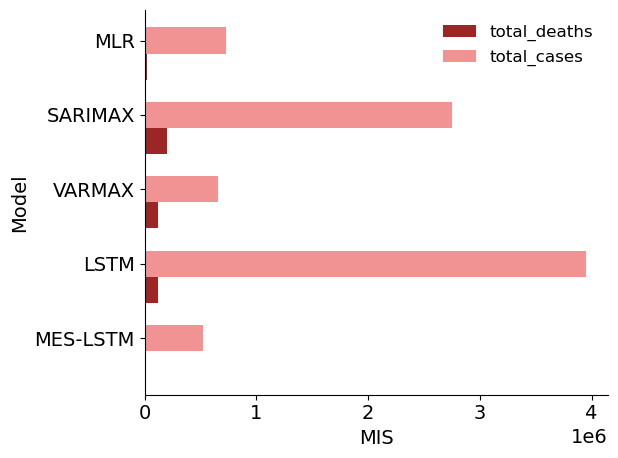

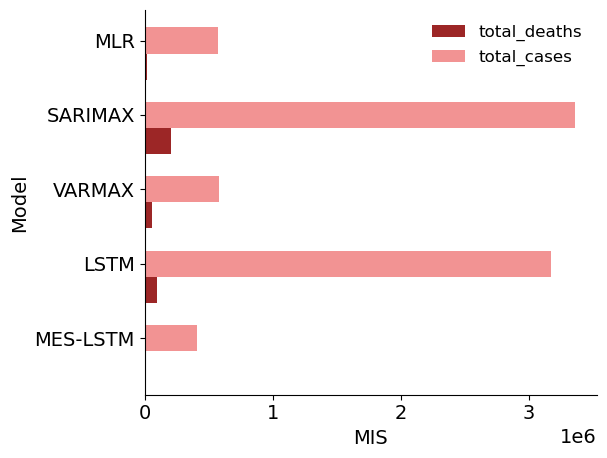

In [17]:
total_cases_2 = cases_acc_2.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_2 = deaths_acc_2.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_05 = cases_acc_05.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_05 = deaths_acc_05.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_1 = cases_acc_1.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_1 = deaths_acc_1.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]

# alpha = 0.05
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_1.pdf', dpi = 600)
plt.show()

# alpha = 0.2
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_2.pdf', dpi = 600)
plt.show()

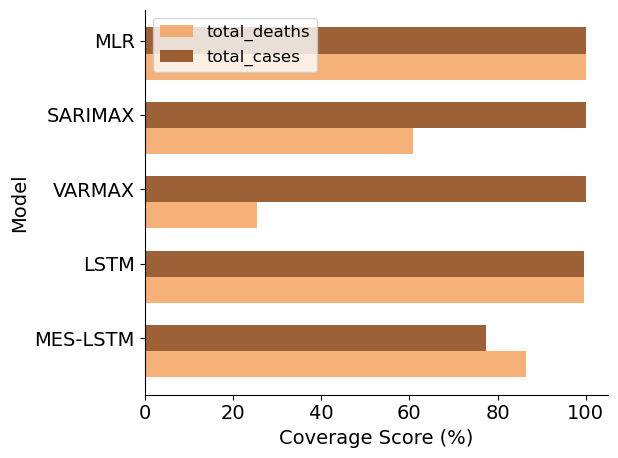

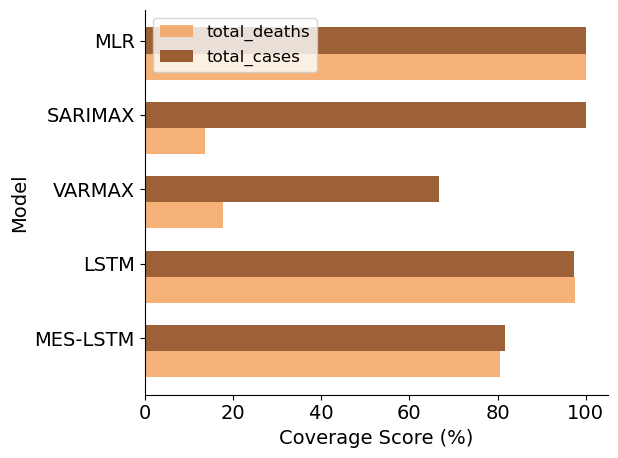

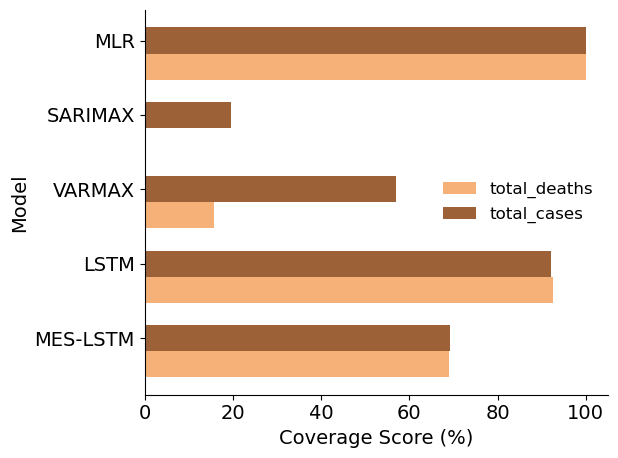

In [18]:
total_cases_2 = cases_acc_2.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_2 = deaths_acc_2.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_05 = cases_acc_05.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_05 = deaths_acc_05.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_1 = cases_acc_1.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_1 = deaths_acc_1.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]

# alpha = 0.05
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = 2, frameon = True, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = 2, frameon = True, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_1.pdf', dpi = 600)
plt.show()

# alpha = 0.2
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_2.pdf', dpi = 600)
plt.show()

### SADC

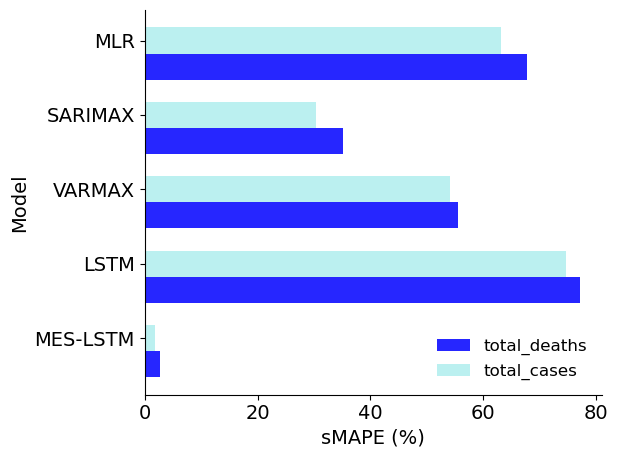

In [19]:
total_cases_2 = cases_sadc_2.filter(like = 'smape').values
total_deaths_2 = deaths_sadc_2.filter(like = 'smape').values

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')
plt.xlabel('sMAPE (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)

plt.tight_layout()
plt.savefig(save_path + 'smape_sadc.pdf', dpi = 600)
plt.show()

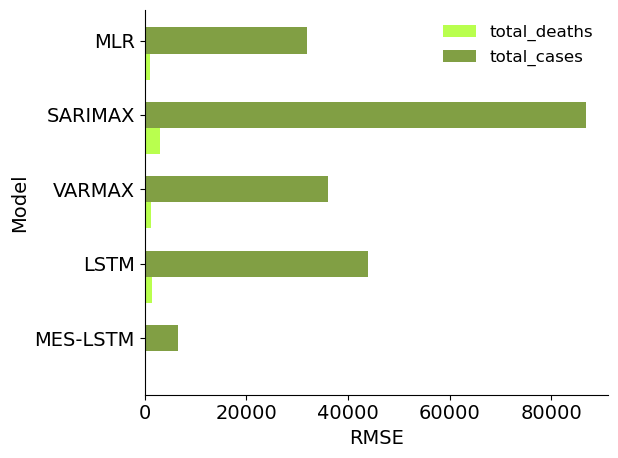

In [20]:
total_cases_2 = cases_sadc_2.filter(like = 'rmse').values
total_deaths_2 = deaths_sadc_2.filter(like = 'rmse').values


fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'rmse_sadc.pdf', dpi = 600)
plt.show()

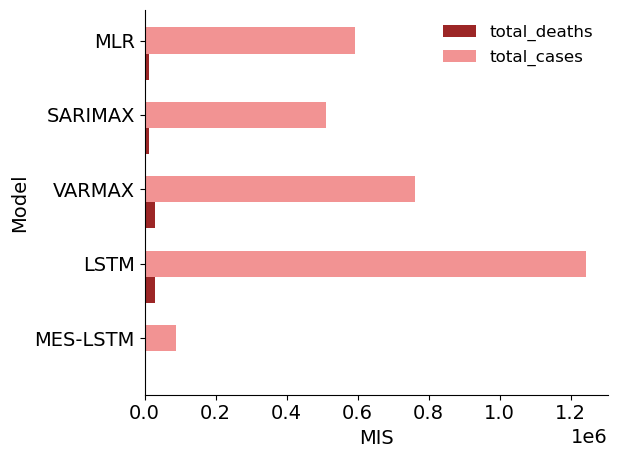

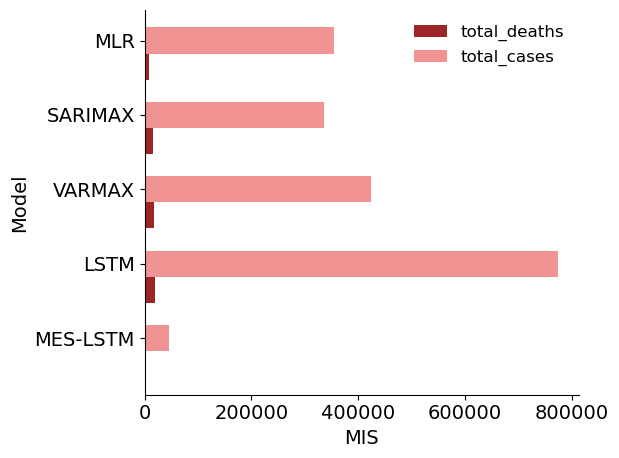

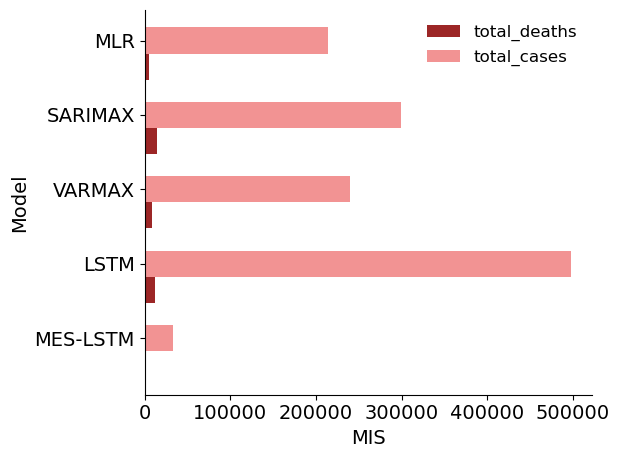

In [21]:
total_cases_2 = cases_sadc_2.filter(like = 'mis').values
total_deaths_2 = deaths_sadc_2.filter(like = 'mis').values
total_cases_05 = cases_sadc_05.filter(like = 'mis').values
total_deaths_05 = deaths_sadc_05.filter(like = 'mis').values
total_cases_1 = cases_sadc_1.filter(like = 'mis').values
total_deaths_1 = deaths_sadc_1.filter(like = 'mis').values

# alpha = 0.05
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_1.pdf', dpi = 600)
plt.show()

# alpha = 0.2
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_2.pdf', dpi = 600)
plt.show()

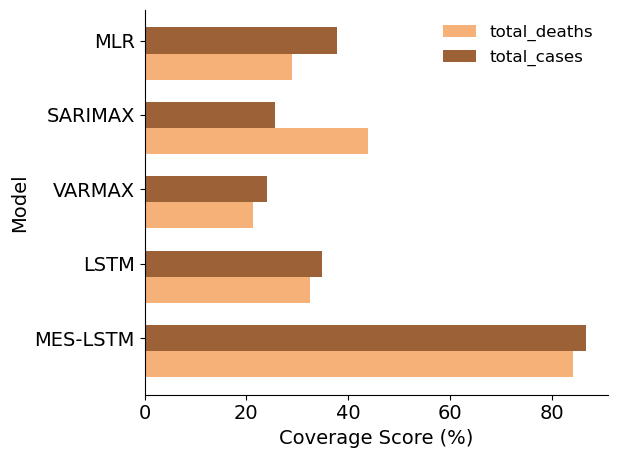

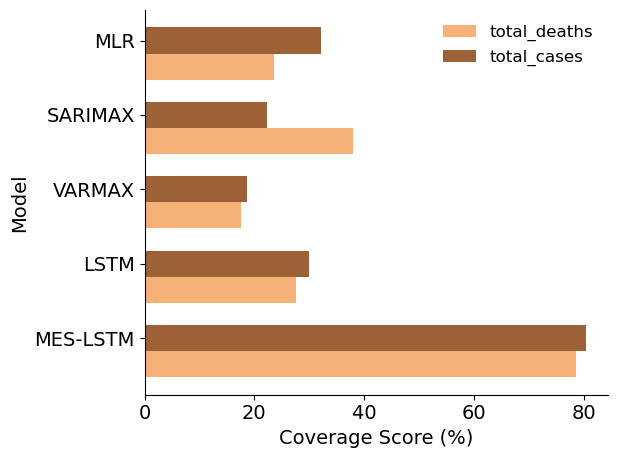

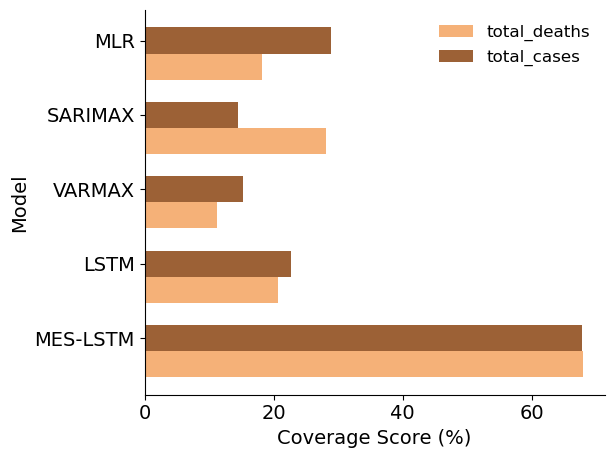

In [22]:
total_cases_2 = cases_sadc_2.filter(like = 'cov').values
total_deaths_2 = deaths_sadc_2.filter(like = 'cov').values
total_cases_05 = cases_sadc_05.filter(like = 'cov').values
total_deaths_05 = deaths_sadc_05.filter(like = 'cov').values
total_cases_1 = cases_sadc_1.filter(like = 'cov').values
total_deaths_1 = deaths_sadc_1.filter(like = 'cov').values

# alpha = 0.05
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font) #TODO
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_1.pdf', dpi = 600)
plt.show()

# alpha = 0.2
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_2, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_2, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = legend_loc, frameon = False, fontsize = legend_font)
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_2.pdf', dpi = 600)
plt.show()

### MAPS

In [23]:
sadc_map = ['Angola', 'Botswana', 'Comoros', 'Democratic Republic of the Congo', 'Swaziland',
            'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia', 'South Africa',
            'United Republic of Tanzania', 'Zambia', 'Zimbabwe', 'Seychelles']

In [24]:
cases_smape_2 = cases_acc_2.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_smape_05 = cases_acc_05.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_smape_1 = cases_acc_1.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_2 = deaths_acc_2.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_05 = deaths_acc_05.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_1 = deaths_acc_1.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_mis_2 = cases_acc_2.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_mis_05 = cases_acc_05.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_mis_1 = cases_acc_1.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_2 = deaths_acc_2.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_05 = deaths_acc_05.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_1 = deaths_acc_1.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_cov_2 = cases_acc_2.filter(like = 'cov_mes', axis = 1).values[:, 0]
cases_cov_05 = cases_acc_05.filter(like = 'cov_mes', axis = 1).values[:, 0]
cases_cov_1 = cases_acc_1.filter(like = 'cov_mes', axis = 1).values[:, 0]

deaths_cov_2 = deaths_acc_2.filter(like = 'cov_mes', axis = 1).values[:, 0]
deaths_cov_05 = deaths_acc_05.filter(like = 'cov_mes', axis = 1).values[:, 0]
deaths_cov_1 = deaths_acc_1.filter(like = 'cov_mes', axis = 1).values[:, 0]


In [25]:
# cases_acc_05

In [26]:
maps = pd.DataFrame(columns = ['country',
                               'cases_smape_2', 'cases_smape_05', 'cases_smape_1',
                               'cases_mis_2', 'cases_mis_05', 'cases_mis_1',
                               'deaths_smape_2', 'deaths_smape_05', 'deaths_smape_1',
                               'deaths_mis_2', 'deaths_mis_05', 'deaths_mis_1'])
maps['country'] = sadc_map
maps['cases_smape_2'], maps['cases_smape_05'], maps['cases_smape_1'] = cases_smape_2, cases_smape_05, cases_smape_1
maps['cases_mis_2'], maps['cases_mis_05'], maps['cases_mis_1'] = cases_mis_2, cases_mis_05, cases_mis_1
maps['cases_cov_2'], maps['cases_cov_05'], maps['cases_cov_1'] = cases_cov_2, cases_cov_05, cases_cov_1
maps['deaths_smape_2'], maps['deaths_smape_05'], maps['deaths_smape_1'] = deaths_smape_2, deaths_smape_05, deaths_smape_1
maps['deaths_mis_2'], maps['deaths_mis_05'], maps['deaths_mis_1'] = deaths_mis_2, deaths_mis_05, deaths_mis_1
maps['deaths_cov_2'], maps['deaths_cov_05'], maps['deaths_cov_1'] = deaths_cov_2, deaths_cov_05, deaths_cov_1

In [27]:
# Load the json file with county coordinates

#geoData = gpd.read_file('https://datahub.io/core/geo-countries/r/countries.geojson') # download from source
geoData = gpd.read_file('countries.geojson')

In [28]:
sadcData = geoData[geoData.ADMIN.isin(sadc_map)]

In [29]:
maps_full = sadcData.merge(maps, left_on=['ADMIN'], right_on=['country'])

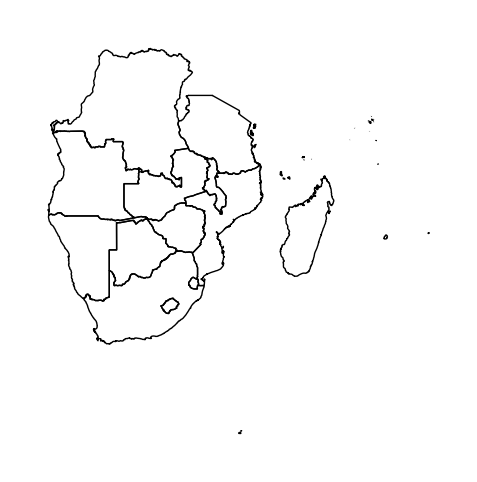

In [30]:
gplt.polyplot(sadcData);

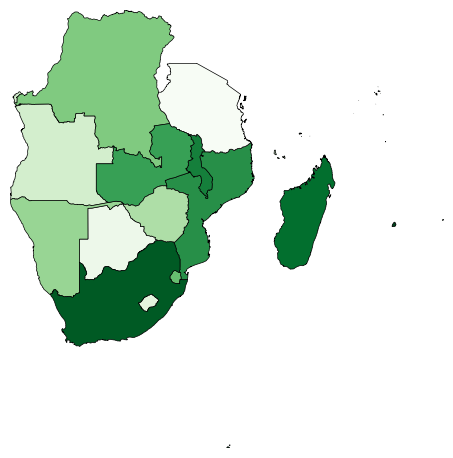

In [31]:
fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="cases_smape_1", 
    linewidth=.5,
    cmap='Greens',
    edgecolor='black',
    extent = maps_full.total_bounds,
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_cases_smape_1.pdf', dpi = 600)
plt.show()

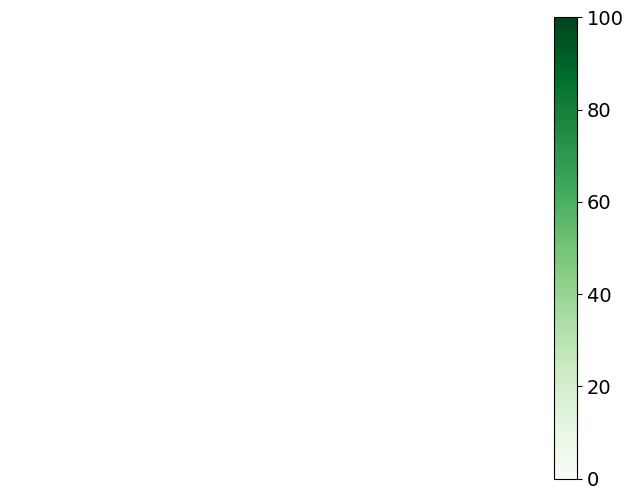

In [32]:
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, 1)
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.tight_layout(pad=0)
plt.savefig(save_path + 'map_cases_smape_1_legend.pdf', dpi = 600)

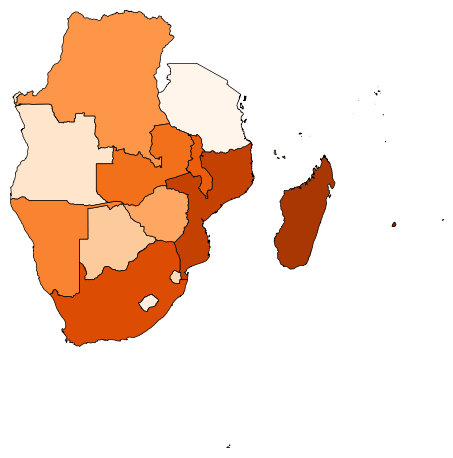

In [33]:
fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="deaths_smape_1", 
    linewidth=.5,
    cmap='Oranges',
    edgecolor='black',
    extent = maps_full.total_bounds,
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_smape_1.pdf', dpi = 600)
plt.show()

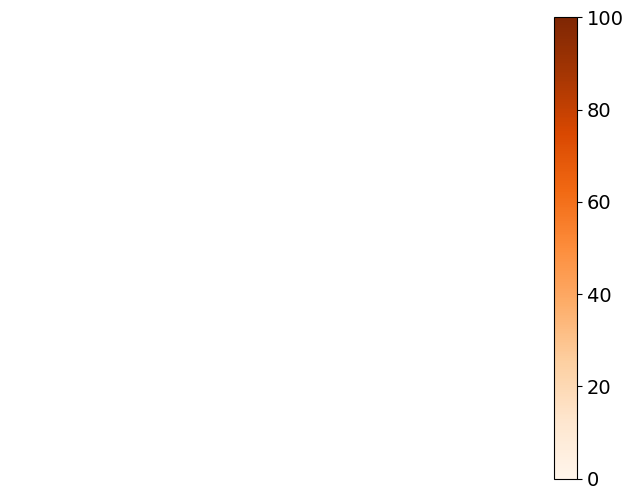

In [34]:
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, 1)
ax.axis('off')
# create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.tight_layout(pad=0)
plt.savefig(save_path + 'map_deaths_smape_1_legend.pdf', dpi = 600)

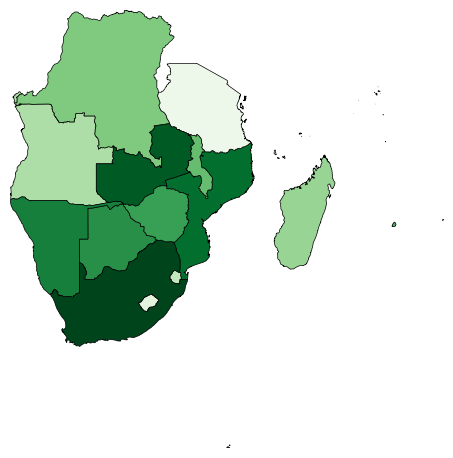

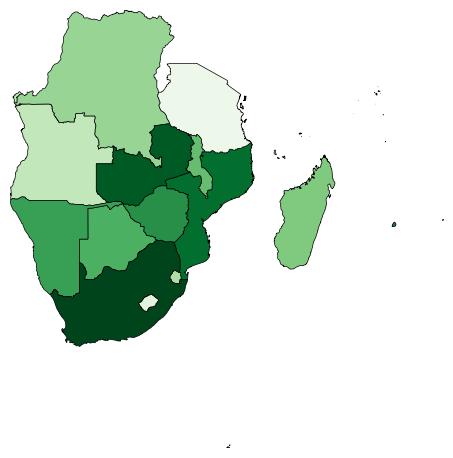

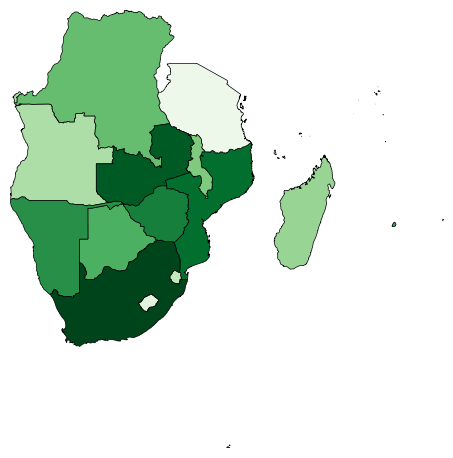

In [35]:
# MIS cases

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="cases_mis_2", 
    linewidth=.5,
    cmap='Greens',
    extent = maps_full.total_bounds,
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_2.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="cases_mis_05", 
    linewidth=.5,
    cmap='Greens',
    extent = maps_full.total_bounds,
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="cases_mis_1", 
    linewidth=.5,
    cmap='Greens',
    extent = maps_full.total_bounds,
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_1.pdf', dpi = 600)
plt.show()

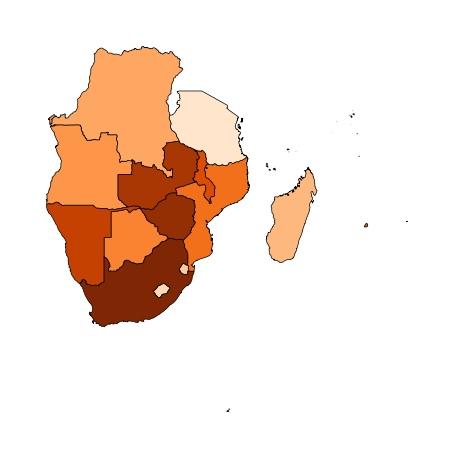

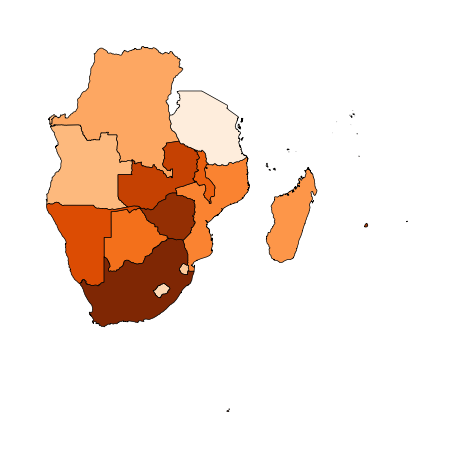

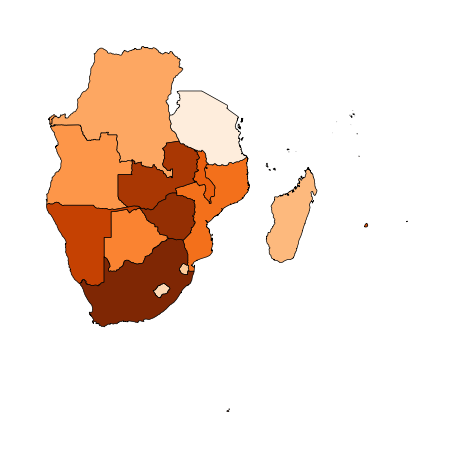

In [36]:
# MIS deaths

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="deaths_mis_2", 
    linewidth=.5,
    cmap='Oranges',
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_2.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="deaths_mis_05", 
    linewidth=.5,
    cmap='Oranges',
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
gplt.choropleth(maps_full, 
    hue="deaths_mis_1", 
    linewidth=.5,
#     scheme=scheme,
    cmap='Oranges',
#     legend=True,
    edgecolor='black',
    ax=ax
);
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_1.pdf', dpi = 600)
plt.show()